# Установка библиотек

In [1]:
!pip install numpy
!pip install plotly
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Импорт библотек

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import interpolate
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

warnings.simplefilter(action="ignore", category=FutureWarning)

# Загрузка исходных данных

In [3]:
df = pd.read_csv("test_well.csv")
df.head()

,DT_HOUR,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
0,2021-03-21 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-21 00:19:23,0,NaN,NaN,NaN,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-21 00:19:26,0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,0.0,37.17,29.5,29.4,29.6,396.0,399.0,399.0,NaN,71.0
3,2021-03-21 00:20:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-21 00:38:32,0,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DT_HOUR      20020 non-null  object 
 1   EXT_DATA     20020 non-null  int64  
 2   LIQ_RATE     146 non-null    float64
 3   OIL_RATE     146 non-null    float64
 4   WATER_CUT    146 non-null    float64
 5   PLIN         6602 non-null   float64
 6   QGAS         146 non-null    float64
 7   FREQ_HZ      6595 non-null   float64
 8   ACTIV_POWER  6592 non-null   float64
 9   PED_T        6595 non-null   float64
 10  PINP         6595 non-null   float64
 11  I_B          6596 non-null   float64
 12  I_A          6596 non-null   float64
 13  I_C          6595 non-null   float64
 14  U_AB         6595 non-null   float64
 15  U_BC         6595 non-null   float64
 16  U_CA         6595 non-null   float64
 17  U_OTP        0 non-null      float64
 18  COS_PHI      6595 non-null   float64
dtypes: f

# Интерполяция данных

Задача 0. Предложить варианты для заполнения пропущенных данных

Так как данные - это временные ряды, я буду интерполировать

In [5]:
df = df.interpolate("linear")
df.head()

,DT_HOUR,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
0,2021-03-21 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.925000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-21 00:19:23,0,NaN,NaN,NaN,16.900000,NaN,NaN,67.923333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-21 00:19:26,0,NaN,NaN,NaN,17.226667,NaN,40.0,67.921667,0.0,37.170000,29.500000,29.400000,29.600000,396.0,399.0,399.0,NaN,71.0
3,2021-03-21 00:20:00,0,NaN,NaN,NaN,17.553333,NaN,40.0,67.920000,0.0,37.163333,29.466667,29.366667,29.566667,396.0,399.0,399.0,NaN,71.0
4,2021-03-21 00:38:32,0,NaN,NaN,NaN,17.880000,NaN,40.0,67.921333,0.0,37.156667,29.433333,29.333333,29.533333,396.0,399.0,399.0,NaN,71.0


In [6]:
df = df.drop(["DT_HOUR"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EXT_DATA     20020 non-null  int64  
 1   LIQ_RATE     19911 non-null  float64
 2   OIL_RATE     19911 non-null  float64
 3   WATER_CUT    19911 non-null  float64
 4   PLIN         20019 non-null  float64
 5   QGAS         19911 non-null  float64
 6   FREQ_HZ      20018 non-null  float64
 7   ACTIV_POWER  20020 non-null  float64
 8   PED_T        20018 non-null  float64
 9   PINP         20018 non-null  float64
 10  I_B          20018 non-null  float64
 11  I_A          20018 non-null  float64
 12  I_C          20018 non-null  float64
 13  U_AB         20018 non-null  float64
 14  U_BC         20018 non-null  float64
 15  U_CA         20018 non-null  float64
 16  U_OTP        0 non-null      float64
 17  COS_PHI      20018 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 2.7 MB


# Предварительный анализ данных

Данные представляют из себя перечень замеров параметров одной скважины

По скважине в различные моменты времени представлены замеры дебитов жидкости, нефти, газа, обводненность, линейное давления,  электротехнические
параметры

Целевая переменная - __дебит жидкости__

Необходимо восстановить значения данного параметра, замеры которого находится в столбце с названием "__LIQ_RATE__"

In [8]:
# Определим количество прямых замеров дебита жидкости
df["LIQ_RATE"].count()

19911

In [9]:
# Проведем анализ имеющихся данных
df.describe()

,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
count,20020.000000,19911.000000,19911.000000,19911.000000,20019.000000,19911.000000,20018.000000,20020.000000,20018.0,20018.000000,20018.000000,20018.000000,20018.000000,20018.000000,20018.000000,20018.000000,0.0,20018.000000
mean,0.855245,416.456193,45.553562,88.102642,17.882822,2159.439512,41.781552,77.415606,0.0,36.535950,31.120781,31.109666,31.243236,394.059097,398.268958,397.043111,NaN,72.359601
std,10.060267,24.966771,2.833601,0.143844,0.287065,231.117299,1.641228,5.948614,0.0,0.377010,1.378777,1.375832,1.398889,2.831497,2.863356,2.831367,NaN,2.320782
min,0.000000,0.000000,0.000000,87.460000,10.890000,0.000000,0.000000,56.005000,0.0,35.870000,0.000000,0.000000,0.000000,380.000000,385.000000,384.000000,NaN,0.000000
25%,0.000000,403.022800,43.978496,88.009392,17.743333,2047.302287,41.000000,72.951000,0.0,36.166667,30.333333,30.300000,30.433333,392.666667,397.000000,396.000000,NaN,71.000000
50%,0.000000,405.797203,44.194286,88.106197,17.906667,2197.177463,41.000000,73.747000,0.0,36.680000,30.600000,30.587500,30.700000,394.000000,399.000000,397.000000,NaN,72.000000
75%,0.000000,436.880854,47.947835,88.212124,18.050000,2282.476983,43.000000,83.550000,0.0,36.810000,32.233333,32.200000,32.400000,396.000000,401.000000,399.000000,NaN,73.000000
max,120.000000,463.690000,50.900000,88.540000,19.010000,2642.390000,43.000000,83.900000,0.0,39.220000,32.400000,32.400000,32.500000,401.000000,403.000000,404.000000,NaN,74.000000


In [10]:
# Очистим датафрейм от неинформативных и пустых столбцов
df = df.drop(["EXT_DATA", "PED_T", "U_OTP"], axis=1)

array([[<Axes: title={'center': 'LIQ_RATE'}>,
        <Axes: title={'center': 'OIL_RATE'}>,
        <Axes: title={'center': 'WATER_CUT'}>,
        <Axes: title={'center': 'PLIN'}>],
       [<Axes: title={'center': 'QGAS'}>,
        <Axes: title={'center': 'FREQ_HZ'}>,
        <Axes: title={'center': 'ACTIV_POWER'}>,
        <Axes: title={'center': 'PINP'}>],
       [<Axes: title={'center': 'I_B'}>, <Axes: title={'center': 'I_A'}>,
        <Axes: title={'center': 'I_C'}>,
        <Axes: title={'center': 'U_AB'}>],
       [<Axes: title={'center': 'U_BC'}>,
        <Axes: title={'center': 'U_CA'}>,
        <Axes: title={'center': 'COS_PHI'}>, <Axes: >]], dtype=object)

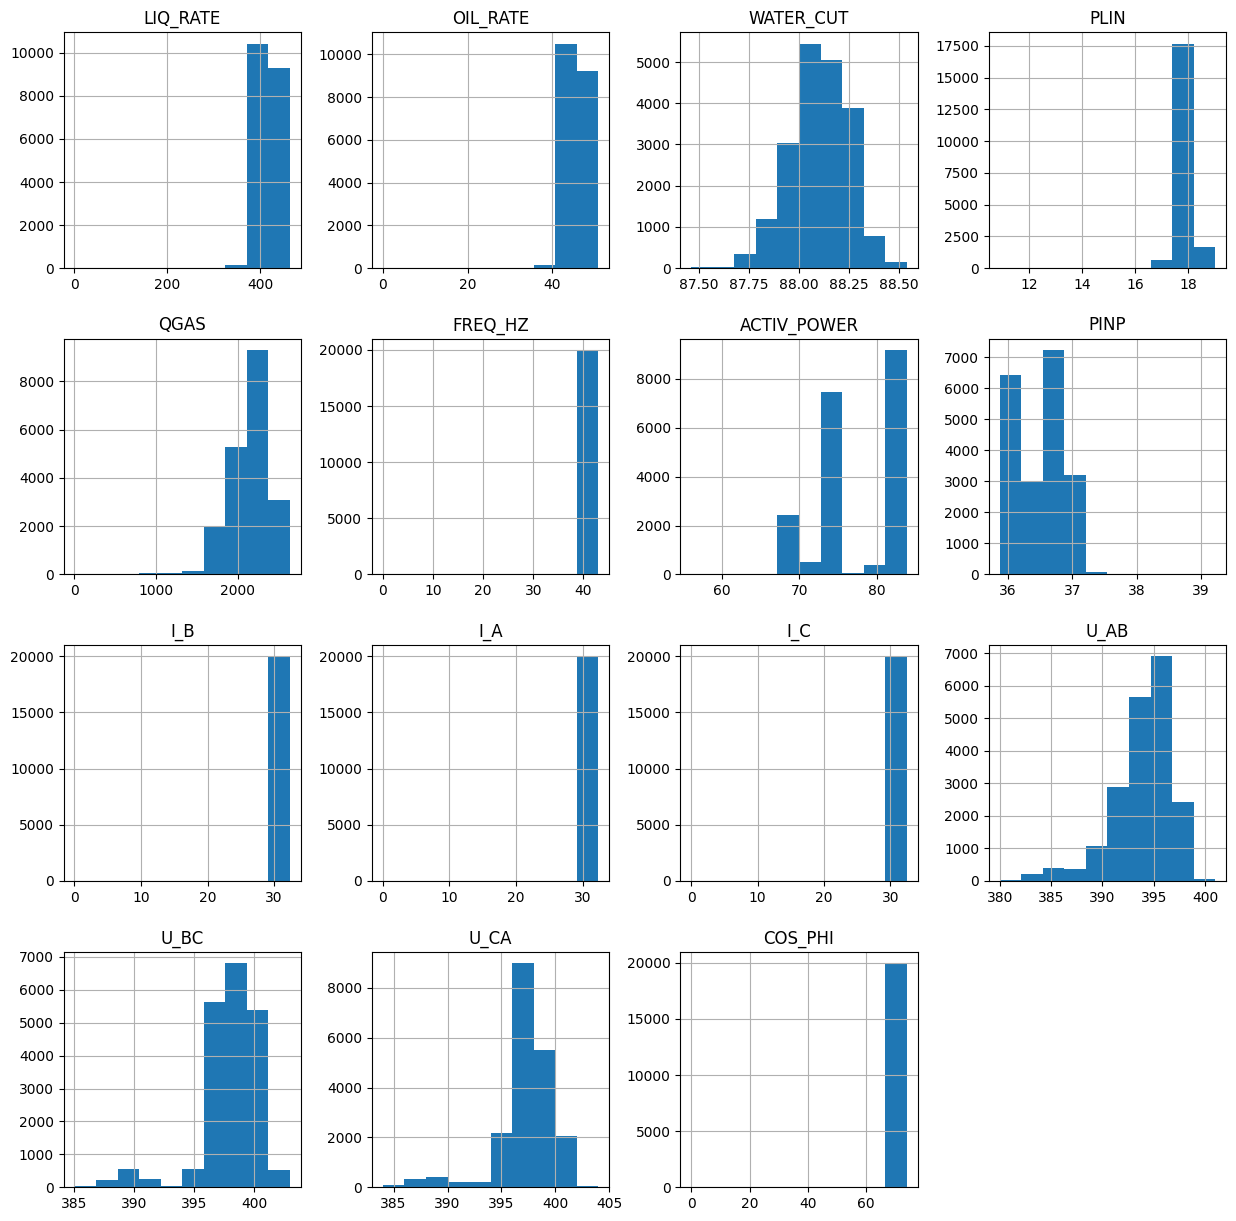

In [11]:
# Построим гистограммы распределения имеющихся данных
df.hist(figsize=(15, 15))

Удаляю выбросы на основе правила трёх сигм

In [12]:
COEF_OUTLIERS = 3

col_val = dict()

for col in df:
    if col == "DT_HOUR":
        continue
    col_np = df[col].to_numpy()
    col_np = col_np[~np.isnan(col_np)]
    mu = np.mean(col_np)
    sigma = np.std(col_np)
    col_val[col] = (mu - COEF_OUTLIERS * sigma, mu + COEF_OUTLIERS * sigma)

for key in col_val.keys():
    l, r = col_val[key]
    df = df.loc[l <= df[key]]
    df = df.loc[df[key] <= r]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18800 entries, 156 to 20019
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIQ_RATE     18800 non-null  float64
 1   OIL_RATE     18800 non-null  float64
 2   WATER_CUT    18800 non-null  float64
 3   PLIN         18800 non-null  float64
 4   QGAS         18800 non-null  float64
 5   FREQ_HZ      18800 non-null  float64
 6   ACTIV_POWER  18800 non-null  float64
 7   PINP         18800 non-null  float64
 8   I_B          18800 non-null  float64
 9   I_A          18800 non-null  float64
 10  I_C          18800 non-null  float64
 11  U_AB         18800 non-null  float64
 12  U_BC         18800 non-null  float64
 13  U_CA         18800 non-null  float64
 14  COS_PHI      18800 non-null  float64
dtypes: float64(15)
memory usage: 2.3 MB


array([[<Axes: title={'center': 'LIQ_RATE'}>,
        <Axes: title={'center': 'OIL_RATE'}>,
        <Axes: title={'center': 'WATER_CUT'}>,
        <Axes: title={'center': 'PLIN'}>],
       [<Axes: title={'center': 'QGAS'}>,
        <Axes: title={'center': 'FREQ_HZ'}>,
        <Axes: title={'center': 'ACTIV_POWER'}>,
        <Axes: title={'center': 'PINP'}>],
       [<Axes: title={'center': 'I_B'}>, <Axes: title={'center': 'I_A'}>,
        <Axes: title={'center': 'I_C'}>,
        <Axes: title={'center': 'U_AB'}>],
       [<Axes: title={'center': 'U_BC'}>,
        <Axes: title={'center': 'U_CA'}>,
        <Axes: title={'center': 'COS_PHI'}>, <Axes: >]], dtype=object)

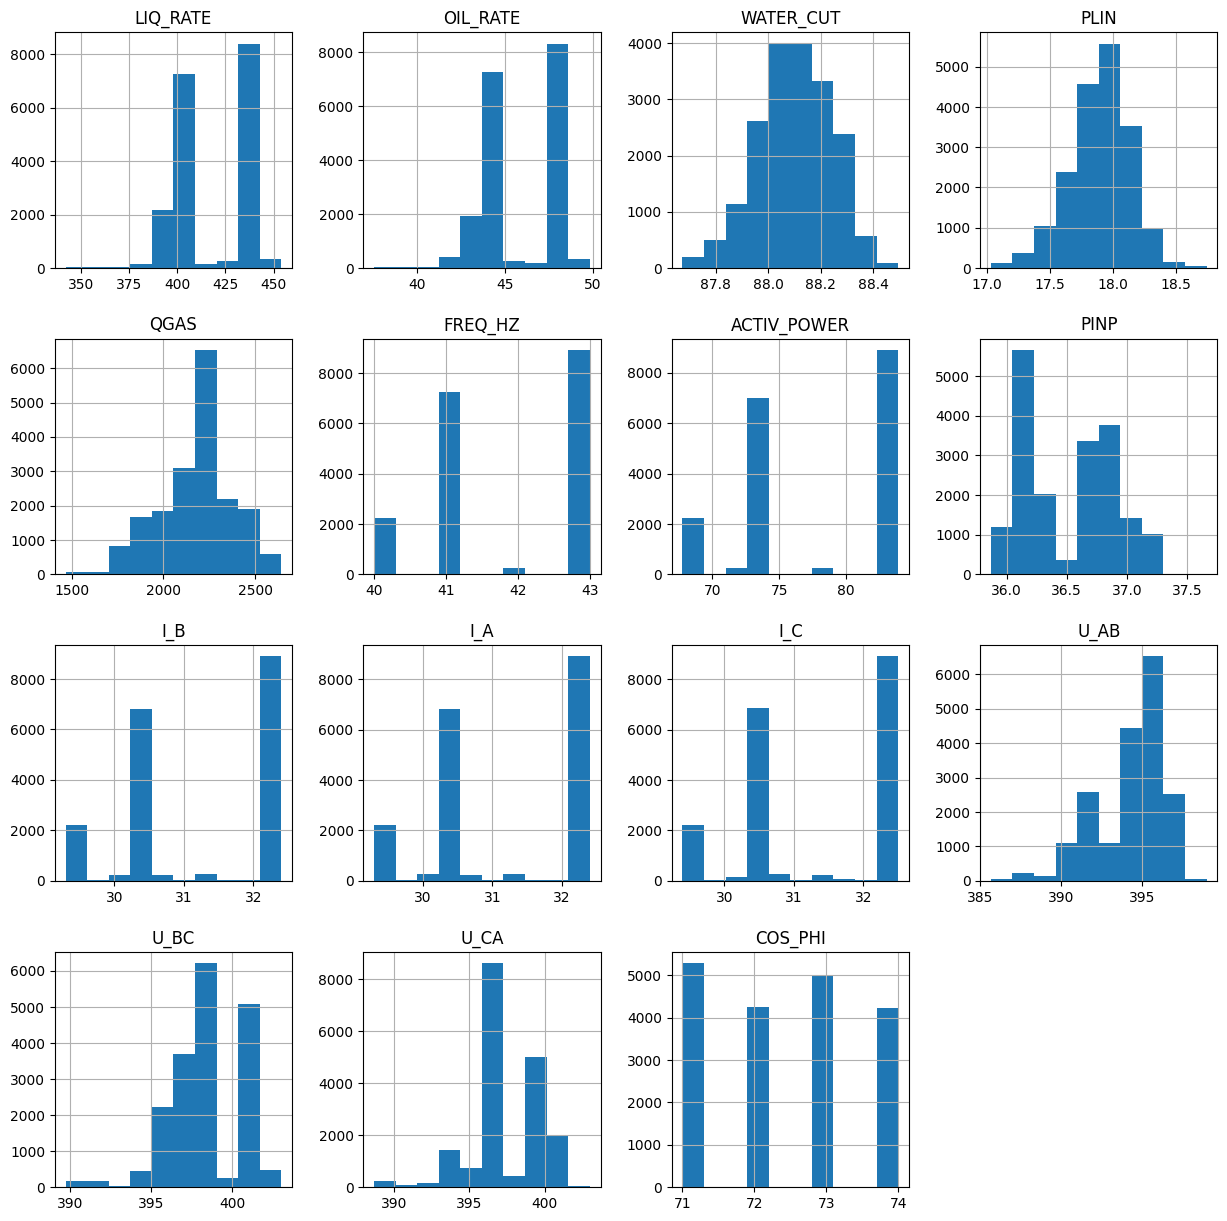

In [14]:
# Построим гистограммы распределения имеющихся данных
df.hist(figsize=(15, 15))

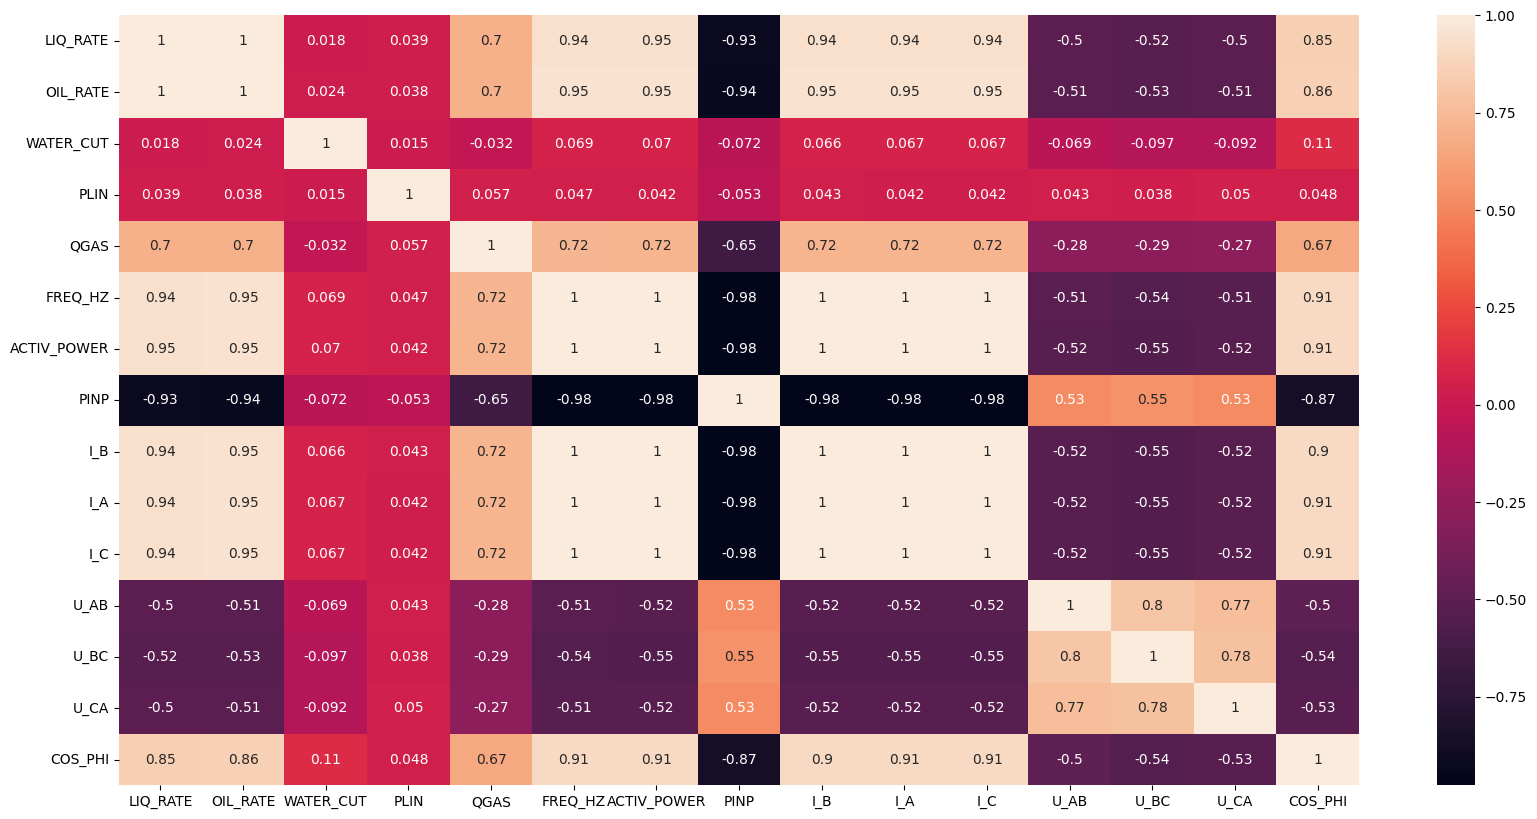

In [15]:
# Рассчитаем коэффициенты корреляции для имеющихся пар признаков
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
pass

# Задача 1. Проверить эмпирическое правило: чем больше напряжение на ПЭД, тем больше дебит жидкости

Коэффициент корреляции между `LIQ_RATE` и `U_AB` равен `-0.51`, значит гипотеза неверна. Более того, коэф отрицателен, то есть более похоже на правду, что меньше напряжение, тем больше дебит жидкости

# Подготовка данных

Удаляю сильно коррелированые признаки

In [16]:
df = df.drop(
    ["OIL_RATE", "ACTIV_POWER", "FREQ_HZ", "I_B", "I_A", "I_C", "PINP"], axis=1
)
df

,LIQ_RATE,WATER_CUT,PLIN,QGAS,U_AB,U_BC,U_CA,COS_PHI
156,389.475234,87.672969,17.976667,1837.430156,394.0,397.000000,399.0,71.0
157,389.488750,87.677500,18.123333,1837.082500,394.0,397.000000,399.0,71.0
158,389.502266,87.682031,18.270000,1836.734844,394.0,397.000000,399.0,71.0
159,389.515781,87.686562,18.156667,1836.387187,394.0,397.000000,399.0,71.0
160,389.529297,87.691094,18.043333,1836.039531,394.0,397.000000,399.0,71.0
...,...,...,...,...,...,...,...,...
20015,433.290000,88.270000,18.140000,2238.410000,394.0,397.000000,397.0,74.0
20016,433.290000,88.270000,18.160000,2238.410000,394.0,397.666667,397.0,74.0
20017,433.290000,88.270000,18.180000,2238.410000,394.0,398.333333,397.0,74.0
20018,433.290000,88.270000,18.180000,2238.410000,394.0,399.000000,397.0,74.0


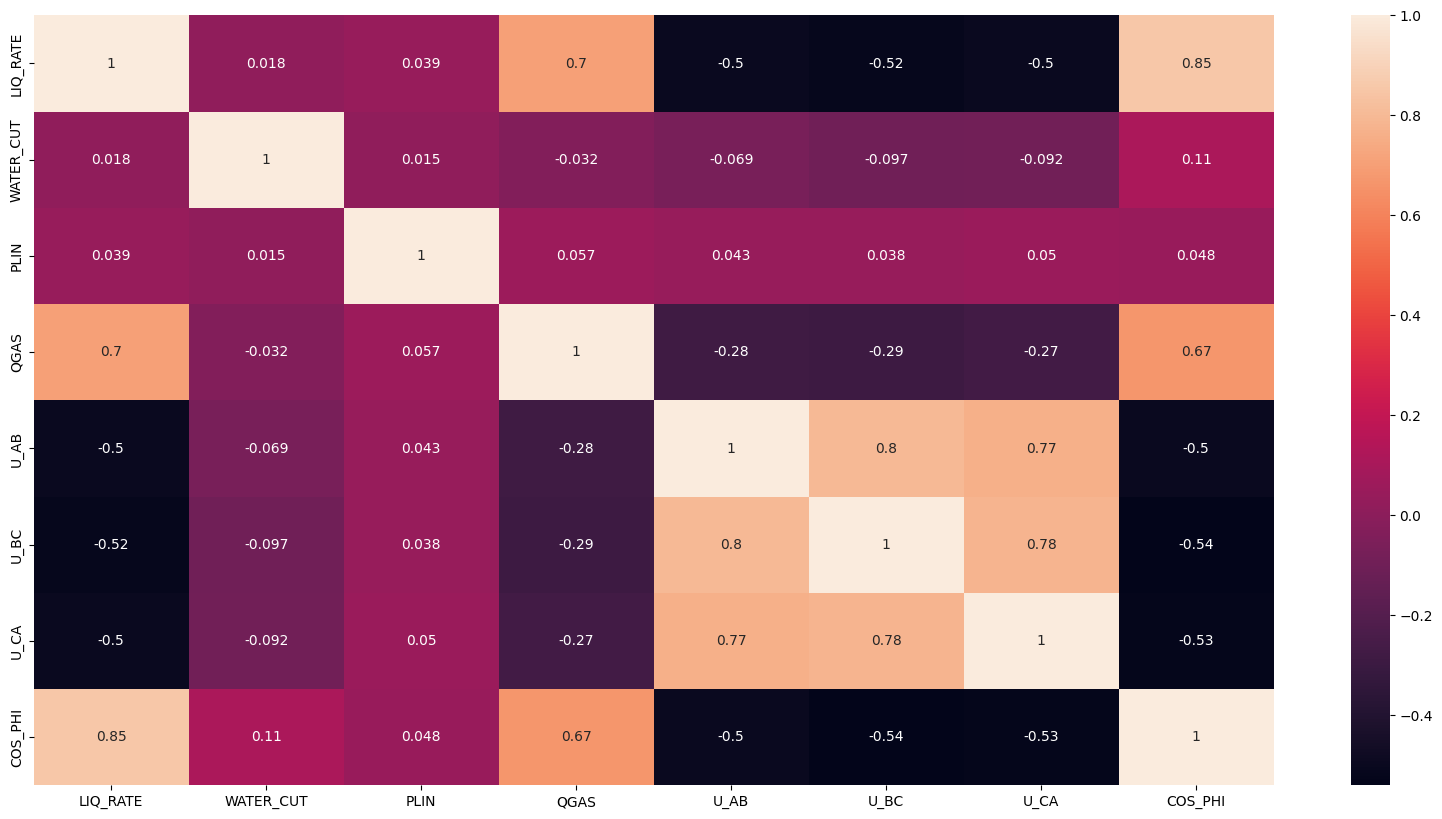

In [17]:
# Рассчитаем коэффициенты корреляции для имеющихся пар признаков
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
pass

# Задача 2. Опираясь на имеющиеся данные, построить модель для предсказания дебита жидкости скважины

In [18]:
X = df.drop(["LIQ_RATE"], axis=1)
y = df["LIQ_RATE"]

In [19]:
X

,WATER_CUT,PLIN,QGAS,U_AB,U_BC,U_CA,COS_PHI
156,87.672969,17.976667,1837.430156,394.0,397.000000,399.0,71.0
157,87.677500,18.123333,1837.082500,394.0,397.000000,399.0,71.0
158,87.682031,18.270000,1836.734844,394.0,397.000000,399.0,71.0
159,87.686562,18.156667,1836.387187,394.0,397.000000,399.0,71.0
160,87.691094,18.043333,1836.039531,394.0,397.000000,399.0,71.0
...,...,...,...,...,...,...,...
20015,88.270000,18.140000,2238.410000,394.0,397.000000,397.0,74.0
20016,88.270000,18.160000,2238.410000,394.0,397.666667,397.0,74.0
20017,88.270000,18.180000,2238.410000,394.0,398.333333,397.0,74.0
20018,88.270000,18.180000,2238.410000,394.0,399.000000,397.0,74.0


In [20]:
y

156      389.475234
157      389.488750
158      389.502266
159      389.515781
160      389.529297
            ...    
20015    433.290000
20016    433.290000
20017    433.290000
20018    433.290000
20019    433.290000
Name: LIQ_RATE, Length: 18800, dtype: float64

# Разбиваем данные на тренировочную и тестовую выборки

In [21]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, train_size=0.8, random_state=1, shuffle=True
)

print("Размерность тренировочных входных данных:", train_X.shape)
print("Размерность тренировочных выходных данных:", train_y.shape)

print("Размерность тестовых входных данных:", test_X.shape)
print("Размерность тестовых выходных данных:", test_y.shape)

Размерность тренировочных входных данных: (15040, 7)
Размерность тренировочных выходных данных: (15040,)
Размерность тестовых входных данных: (3760, 7)
Размерность тестовых выходных данных: (3760,)


# Обучаем модель

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
def best(model):
    print("Лучшие гиперпараметры модели:", model.best_params_)
    print("Лучший счёт модели:", model.best_score_)
    print(model.__dict__)

In [24]:
from sklearn.tree import DecisionTreeRegressor

gscv1 = GridSearchCV(
    Pipeline([("dtr", DecisionTreeRegressor())]),
    {
        "dtr__criterion": [
            "squared_error",
            "friedman_mse",
            "absolute_error",
            "poisson",
        ],
        "dtr__max_depth": [4, 8, 12],
    },
)
gscv1.fit(train_X, train_y)
best(gscv1)
model = gscv1.best_estimator_

Лучшие гиперпараметры модели: {'dtr__criterion': 'absolute_error', 'dtr__max_depth': 12}
Лучший счёт модели: 0.9838515672666208
{'scoring': None, 'estimator': Pipeline(steps=[('dtr', DecisionTreeRegressor())]), 'n_jobs': None, 'refit': True, 'cv': None, 'verbose': 0, 'pre_dispatch': '2*n_jobs', 'error_score': nan, 'return_train_score': False, 'param_grid': {'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'dtr__max_depth': [4, 8, 12]}, 'multimetric_': False, 'best_index_': 8, 'best_score_': 0.9838515672666208, 'best_params_': {'dtr__criterion': 'absolute_error', 'dtr__max_depth': 12}, 'best_estimator_': Pipeline(steps=[('dtr',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_depth=12))]), 'refit_time_': 4.511394023895264, 'feature_names_in_': array(['WATER_CUT', 'PLIN', 'QGAS', 'U_AB', 'U_BC', 'U_CA', 'COS_PHI'],
      dtype=object), 'scorer_': <function _passthrough_scorer at 0x7ffa7046aef0>,

# Делаем прогноз

In [25]:
Y_predicted = model.predict(test_X)
Y_test = test_y

In [44]:
# Визуализация полученных результатов
def plt_col(colname):
    plt.scatter(test_X[colname], Y_test, color="green", label = "Истинное значение")
    plt.scatter(test_X[colname], Y_predicted, color="red", label = "Предсказанное значение")
    plt.ylabel("LIQ_RATE")
    plt.xlabel(colname)
    plt.legend()
    plt.show()

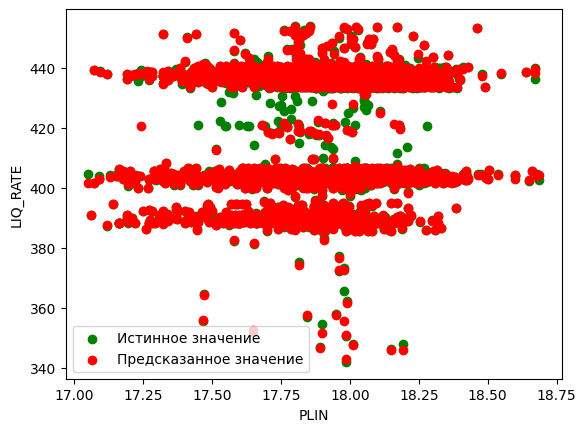

In [47]:
plt_col("PLIN")

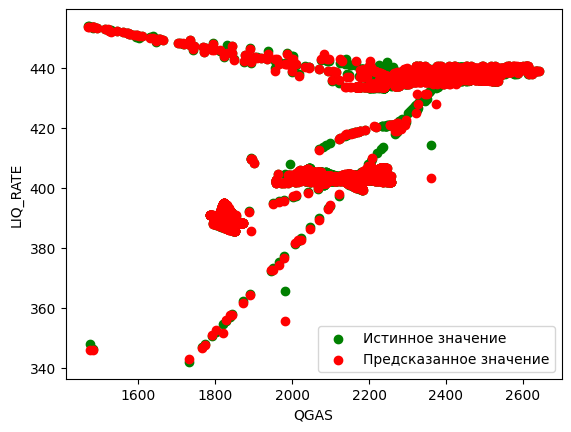

In [46]:
plt_col("QGAS")

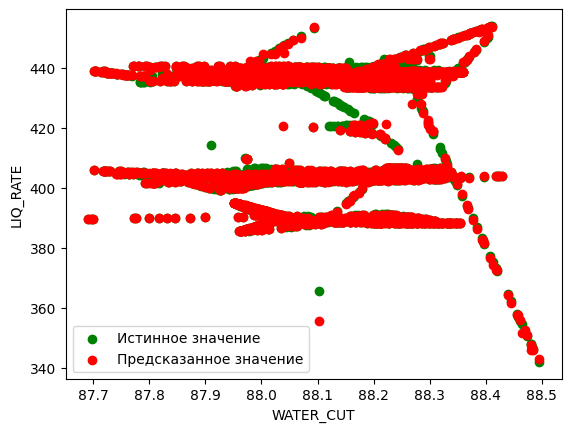

In [48]:
plt_col("WATER_CUT")

# Оценка качества модели

In [26]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_predicted))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_predicted))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted))
)
print("R2 Score:", metrics.r2_score(Y_test, Y_predicted))

Mean Absolute Error: 0.47628437484512404
Mean Squared Error: 2.568046015833934
Root Mean Squared Error: 1.6025124073884527
R2 Score: 0.9931594029293986
